# Bspline

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 56867 bytes to pyBspline.py


In [ ]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Dominio 1D

## Codominio 1D

### Funzioni di base

In [25]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=5 #base cardinality
xmin = 0
xmax = 1#N-P

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  3
base caridnality  :  5
knots             :  [0.  0.  0.  0.  0.5 1.  1.  1.  1. ]


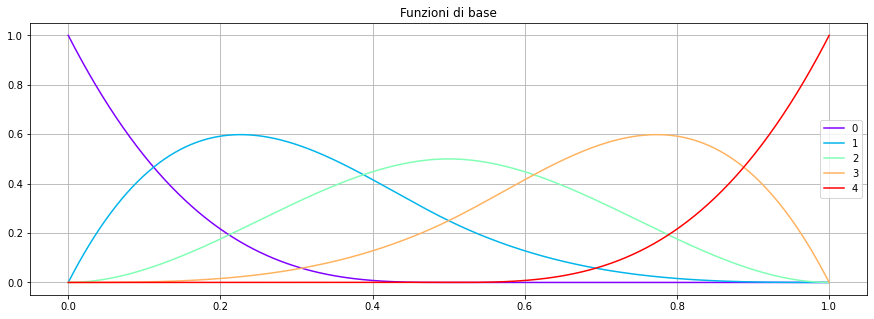

In [26]:
#grafico le funzioni di base
x = np.linspace(xmin,xmax,1000,endpoint=True)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    #print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.title("Funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

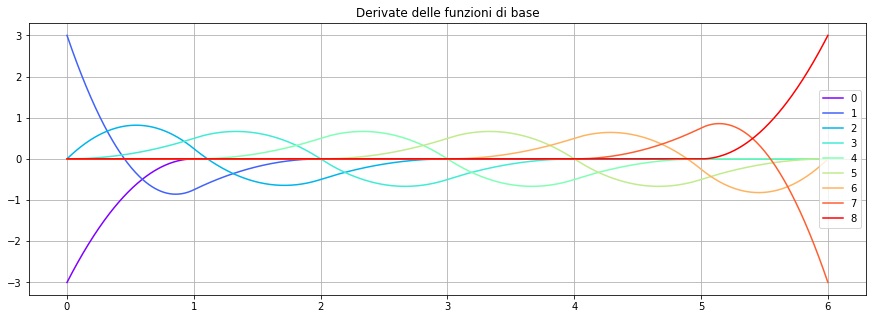

In [8]:
#grafico le funzioni derivate di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

der = bs.derivative()

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.title("Derivate delle funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

## Approssimazione: 1D $\rightarrow$ 1D

In [71]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=12 #base caridnality
xmin = 0.
xmax = 10.

kv =  Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  12
knots             :  [ 0.  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 10. 10.]


In [72]:
#function
def func(x):
    return np.sin(2*np.pi*x/5) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [73]:
#fitting_Bspline
def fitting_Bspline(x,*par):
    #bs.clear_cp()
    for i in range(len(par)):
        bs.set_cp(i,par[i])
    return bs.evaluate(x)        

In [74]:
#x,y
x = np.linspace(xmin,xmax,100,endpoint=True)
y = func(x)

In [75]:
#fit
p0 = list ( np.zeros(N))
popt,pcov = curve_fit(fitting_Bspline,x,y,p0=p0)
#print(popt)

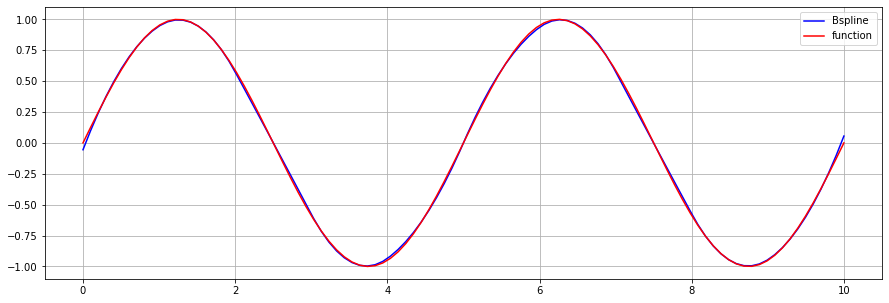

In [76]:
#grafico
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

bs.approximate(func,opts={"N":[100]})
yb = bs.evaluate(x)
yf = func(x)

for i in range(len(popt)):
    bs.set_cp(i,popt[i])
yfit = bs.evaluate(x)
    
plt.plot(x, yb  , color= "blue"  ,label="Bspline")
plt.plot(x, yf  , color= "red"   , label="function")
#plt.plot(x, yfit, color= "green" , label="fit")
    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])


polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [3]:
#function
def func(t):
    #print(cpz)
    a = 20
    cpx = t#np.random.rand(N)
    cpy = np.cos(a*t)/2.0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
#approximate
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]

In [5]:
#xy
NN = 1000
t= np.linspace(xmin,xmax,NN)

#
xy   = bs.evaluate(t)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#
xy = func(t)
df0 = pd.DataFrame(xy)
df0 = df0.rename(columns={0:"x",1:"y"})

index = 800
der = bs.derivative()
arrow = der.evaluate(t[index])

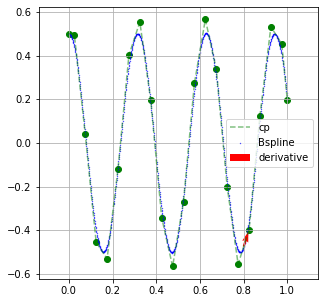

In [6]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "blue",label="Bspline",s=0.1)
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
plt.quiver( *list(df.iloc[index]) , *arrow ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

## Codominio 3D

### Curva in 3D

In [7]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
#
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(0,1,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [8]:
#func
def func(t):
    cpz = t#np.random.rand(N)
    #print(cpz)
    a = 20
    cpx = np.sin(a*t)#np.random.rand(N)
    cpy = np.cos(a*t)#np.random.rand(N)
    out = np.zeros(shape=(len(t),3))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
        out[i,2] = cpz[i]
    return out

In [9]:
#approximate
cp = bs.approximate(func,opts={"delta":[100]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]
#cp

In [10]:
#xy
NN = 1000
t = np.linspace(0.,1.,NN,endpoint=False)

In [11]:
#
xyz = func(t)
df0 = pd.DataFrame(xyz)
df0 = df0.rename(columns={0:"x",1:"y",2:"z"})
df0["x0"] = t
#df0

In [12]:
#
xyz = bs.evaluate(t)
df = pd.DataFrame(xyz)
df = df.rename(columns={0:"x",1:"y",2:"z"})
#df["x0"] = t
#df
index = 100
der = bs.derivative()
arrow = der.evaluate(t[index])

NameError: name 'set_axes_equal' is not defined

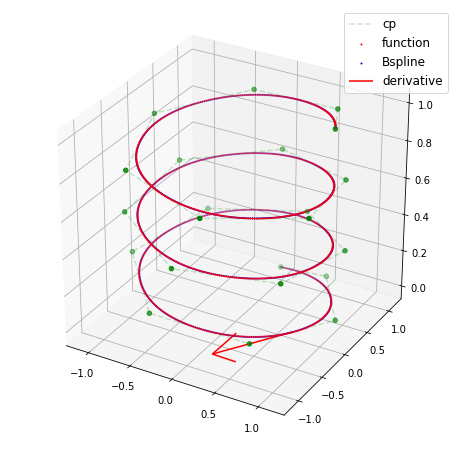

In [13]:
#grafico
fig = plt.figure ( 0 , figsize=(8,8) )    
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
#plt.plot(pyx, pyy, pyz)

#converto in dataframe    
X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
ax.scatter(cpx,cpy,cpz,color="green",marker='o')
ax.scatter(df0["x"],df0["y"],df0["z"], color= "red",label="function",s=1)
ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="Bspline",s=1)
plt.quiver( *list(df.iloc[index]) , *arrow  , \
               normalize=True,label="derivative",color="red")

plt.legend(fontsize=12)
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
#plt.axis('equal')
set_axes_equal(ax)
plt.show()

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N = 3

xmin = 0.0
xmax = 5.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0.  0.  2.5 5.  5. ]


In [89]:
#grafico le funzioni di base
Nx = 40
Ny = 40
x = np.linspace(xmin,xmax,Nx,endpoint=False)
y = np.linspace(xmin,xmax,Ny,endpoint=False)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

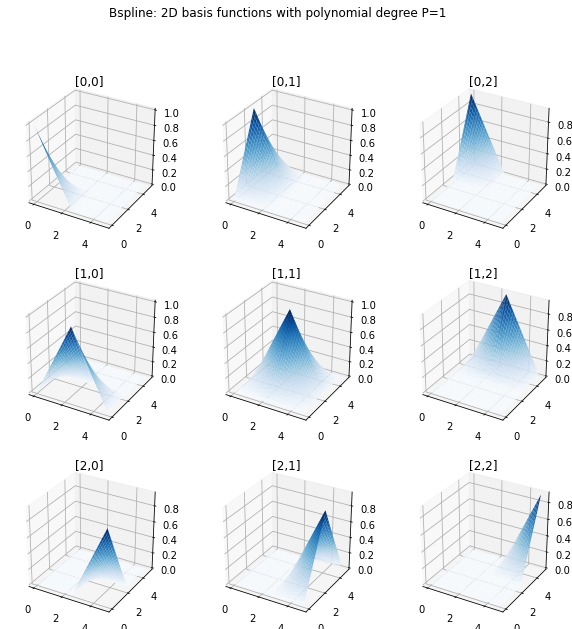

In [90]:
#%matplotlib widget

#
L  = 0#
R  = N
NP = N

#
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

treD = True

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        if treD == True :
            ax = fig.add_subplot(NP, NP, k, projection='3d')
        else :
            ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        if treD == True :
            ax.plot_surface(X, Y, Z, cmap='Blues')
        else :
            ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        
        title = "[%d,%d]"%(i,j)
        ax.set_title(title)
        #plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [27]:
#%matplotlib widget
i = 1
j = 1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#        
der = bs.derivative()
vx = der[0].evaluate(XY)#.reshape((Nx,Ny))
vy = der[1].evaluate(XY)#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

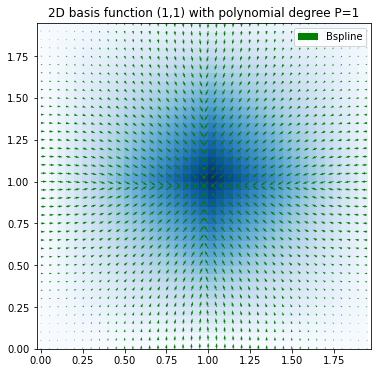

In [28]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#
plt.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")
plt.quiver(XY[:,0],XY[:,1],vx,vy,color="green",label="Bspline")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

## Codominio 3D

### Sphere

In [39]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=10 #base caridnality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=6 #base caridnality
vmin = 0#-1
vmax = np.pi#1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [30]:
#sfera
def Sphere(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = np.sin(v)*np.cos(u)#(1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = np.sin(v)*np.sin(u)#(1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = np.cos(v)#v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [31]:
#approximate
cp = bs.approximate(Sphere,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [32]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Sphere(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [33]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

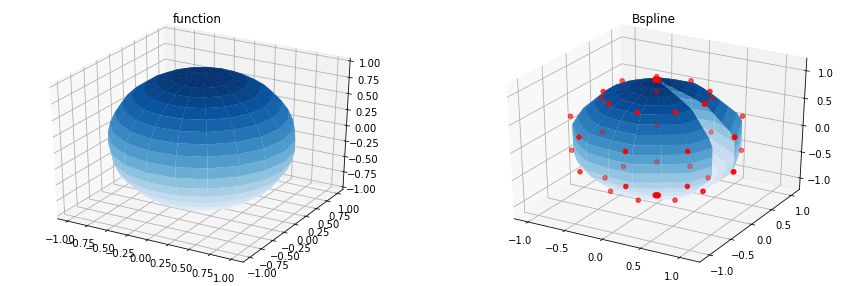

In [34]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
set_axes_equal(ax)
#plt.axis('equal')
plt.show()

### Moebius

In [59]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=20 #base cardinality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=5 #base caridnality
vmin = -1
vmax = 1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [60]:
#Moebius
def Moebius(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = (1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = (1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [61]:
#approximate
cp = bs.approximate(Moebius,opts={"delta":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [62]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Moebius(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [63]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

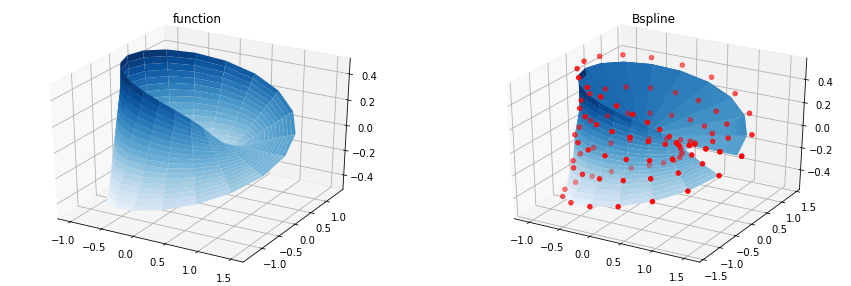

In [64]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")
#set_axes_equal(ax)

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
#set_axes_equal(ax)
#plt.axis('equal')
plt.show()

## Approssimazione: 2D $\rightarrow$  1D

In [20]:
#definisco la dimensionaità:
sh = Bs.shape(2,1)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=5 #base caridnality
xmin = 0.
xmax = 1.

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

polinomial degree :  3
base caridnality  :  5
knots             :  [0.  0.  0.  0.  0.5 1.  1.  1.  1. ]


In [21]:
#funzione
def func(xy):
    #(x, y) = xy
    return np.cos(2*np.pi*xy[:,0]) + np.sin(2*np.pi*xy[:,1]) #+ np.power(x,5.0)#np.full(len(x),1.0)     

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [22]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

In [23]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = func(XY)
Z = z.reshape(Nx,Ny)

In [32]:
# fit
p0 = list ( np.zeros(N**2))
popt,pcov = curve_fit(fitting_Bspline,XY,z,p0=p0)
#print(popt)
# control points
for i,j in zip(il,range(len(popt))):
        bs.set_cp(i,popt[j])
zF = bs.evaluate(XY)
ZF=zF.reshape(Nx,Ny)

In [24]:
# approssimazione
file = "files/om-2d-1d-P="+str(P)+"-N="+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("om",file)
cp = bs.approximate(func)
bs.save("om",file)
zB = bs.evaluate(XY)
ZB=zB.reshape(Nx,Ny)

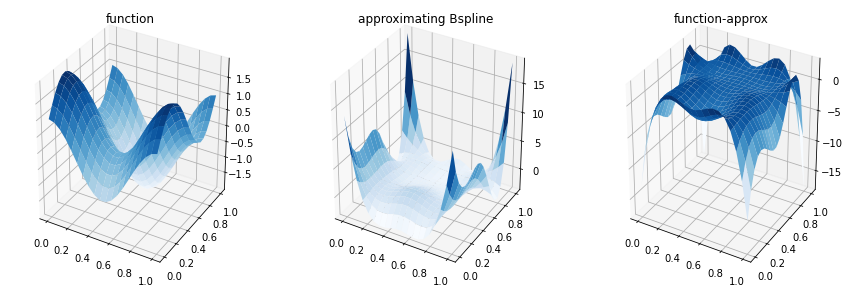

In [25]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(131 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(132 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues')
ax.set_title("approximating Bspline")
#ax.scatter(X,Y,cp,color="red",marker='o')

ax = fig.add_subplot(133 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap= 'Blues')#cmap='RdBu_r')
ax.set_title("function-approx")

#ax = fig.add_subplot(133 , projection='3d')      
#ax.plot_surface(X, Y, ZF, cmap='Blues')
#ax.set_title("fit")

plt.show()

# Dominio 3D

## Codominio 1D

### Funzioni di base

In [50]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
#N0 = 4
N = 3  #base caridnality
#
xmin = 0.0
xmax = 2.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0. 0. 1. 2. 2.]


In [51]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

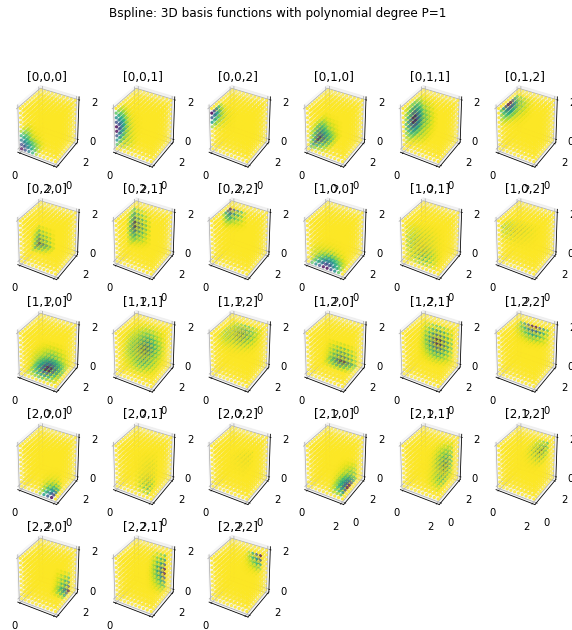

In [52]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 3D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

cmap = plt.get_cmap('viridis_r')

k=1
for i in range(0,N):
    for j in range(0,N):
        for w in range(0,N):
            #print(k)
            ax = fig.add_subplot(5,6,k, projection='3d')
            k=k+1

            #
            bs.clear_cp()
            bs.set_cp([i,j,w],1.0)
            #
            t=bs.evaluate(XYZ) 
           
            #
            norm = Normalize(vmin=min(t), vmax=max(t))
            ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
            title = "[%d,%d,%d]"%(i,j,w)
            ax.set_title(title)
            #        
            #ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
            #plt.axis('equal')
            #ax.set_zlim(0,1.2)
            #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [50]:
#%matplotlib widget
i = 0
j = 0
k = 0

#
bs.clear_cp()
bs.set_cp([i,j,k],1.0)
#
t=bs.evaluate(XYZ) 
Z=t.reshape(Nx,Ny,Nz)
#        
normalize = 10 
der = bs.derivative()
vx = der[0].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vy = der[1].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vz = der[2].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

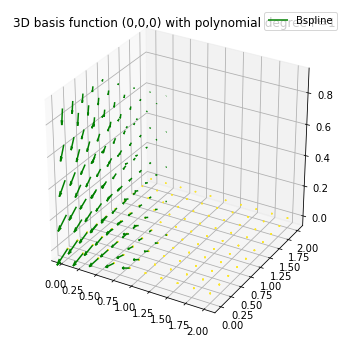

In [51]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )
ax = fig.add_subplot(111, projection='3d')
#
t=bs.evaluate(XYZ)            
#
norm = Normalize(vmin=min(t), vmax=max(t))
plt.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
plt.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],vx,vy,vz,color="green",label="Bspline")
#ax.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")

#plt.axis('equal')
plt.legend()
plt.title("3D basis function (%d,%d,%d) with polynomial degree P=%d" %(i,j,k,P) )
plt.show()

# Galerkin Method

In [45]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 2  #polinomial degree
N = 14

xmin = -1.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

delta_Galerkin = 2 
delta_approximate = 2

In [46]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

In [47]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

## Dominio 2D - esempio 1

In [48]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [49]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("sm",file) 
cp = bs.Galerkin(func,gD,opts={"delta":[delta_Galerkin,delta_Galerkin]})

In [50]:
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [51]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("om",file)
cp = bs.approximate(gD,opts={"delta":[delta_approximate,delta_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [52]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

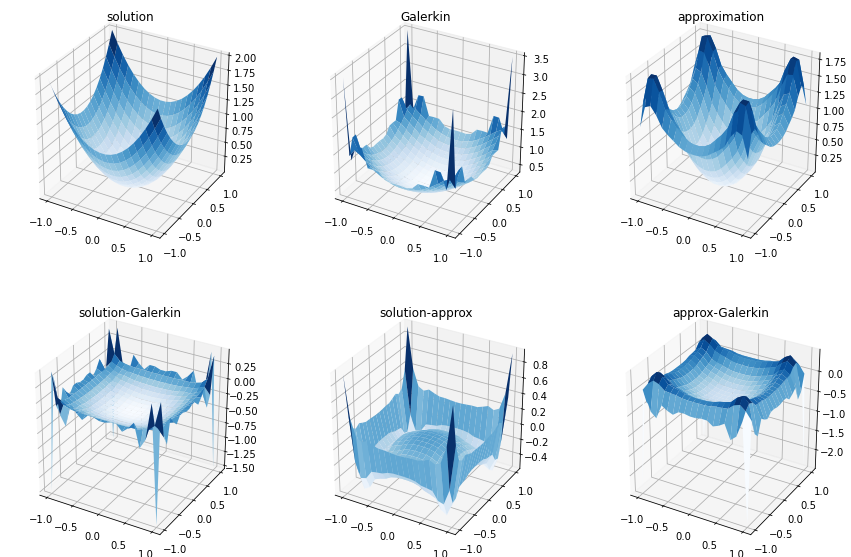

In [53]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

In [59]:
print(min(Z.ravel()))
print(min(ZB.ravel()))

0.0055401662049861375
0.3493592810083463


## Dominio 2D - esempio 2

In [61]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    out = np.cos(x) + np.cos(y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    out = - np.cos(x) - np.cos(y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [62]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("sm",file)
cp = bs.Galerkin(func,gD,opts={"delta":[delta_Galerkin,delta_Galerkin]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [63]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("om",file)
cp = bs.approximate(gD,opts={"delta":[delta_approximate,delta_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [64]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

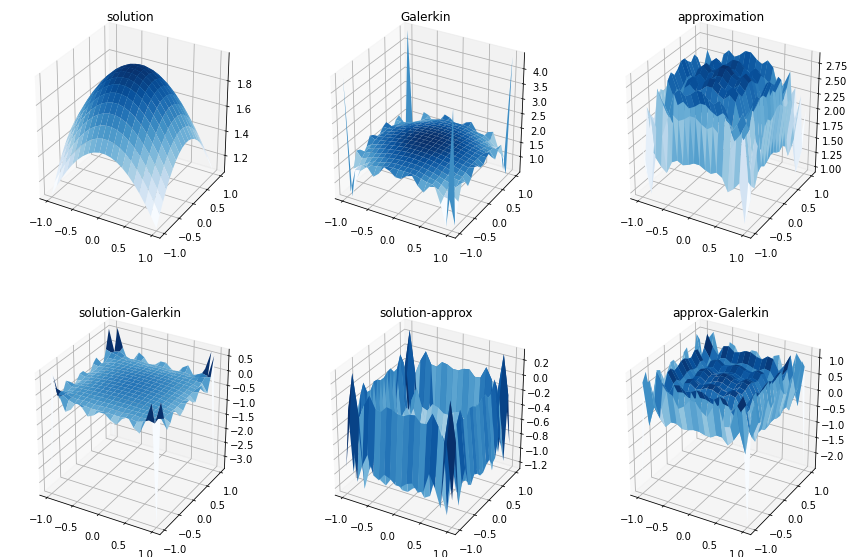

In [65]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

## Dominio 2D - esempio 3

In [66]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    out = x**2 + y**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    out = np.full(shape=(len(x),1),fill_value=4)
    return -out

In [67]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("sm",file)
cp = bs.Galerkin(func,gD,opts={"delta":[delta_Galerkin,delta_Galerkin]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [68]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True:
    bs.load("om",file)
cp = bs.approximate(gD,opts={"delta":[delta_approximate,delta_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [69]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

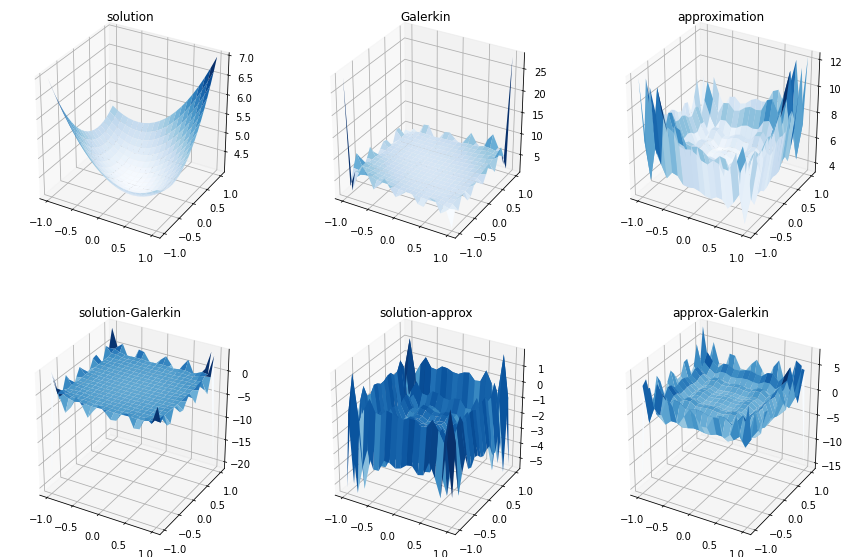

In [70]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

plt.show()

# Test

In [43]:
test_dir = "test/"

In [44]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

xmin = -1.0
xmax = 1.0

delta_Galerkin = 2 
delta_approximate = 2

In [4]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

## Stiffness matrix

In [4]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = False

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]


for P in PP :
    for N in NN:

        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
        #bs.show()

        sm = bs.stiffness_matrix()

        file = test_dir+"stiffness_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("sm",file)

        #sm.to_csv(file)
print("Finished")

Finished


## Overlap matrix

In [7]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]


for P in PP :
    for N in NN:

        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
        #bs.show()

        ov = bs.overlap_matrix()

        file = test_dir+"overlap_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("om",file)

        #sm.to_csv(file)
print("Finished")

Finished


## Galerkin

In [9]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
    
        #bs.show()
        
        infile = test_dir+"stiffness_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.load("sm",infile)
                
        #Galerkin
        cp = bs.Galerkin(func,gD,opts={"delta":[delta_Galerkin,delta_Galerkin]})
        
        outfile = test_dir+"solution-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("cp",outfile)
        #cp.to_csv(outfile,index_label="index")
        
        lvfile = test_dir+"load_vector-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("lv",lvfile)
        
print("Finished")

Finished


## Evaluate

In [15]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        bs = Bs.Bspline(sh, [kv,kv])
        
        solfile = test_dir+"solution-"+ str(P)+"/"+str(N)+".csv"  
        
        bs.load("cp",solfile)
        #bs._cp = pd.read_csv(solfile,index_label="index")
        
        
        zb = bs.evaluate(XY)
        ZB = zb.reshape(Nx,Ny)
        
        
        outfile = test_dir+"evaluate-"+ str(P)+"/"+str(N)#+".txt"    
        
        np.save(outfile,ZB)
        
        
print("Finished")

Finished


## Lebesgue

In [45]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

In [50]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

Lebesgue = pd.DataFrame(index = NN,columns=PP)

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue
               
        #
        infile = test_dir+"evaluate-"+ str(P)+"/"+str(N)+".npy"            
        ZB = np.load(infile)
        
        #
        diff = Z - ZB
        
        norm = np.sqrt(np.mean(np.power(diff,2)))
        
        Lebesgue.at[N,P] = norm
        
print("Finished")

Finished


In [51]:
Lebesgue

,1,2,3
4,3.86749,4.0339,3.98305
5,3.8766,3.91506,4.13849
6,3.88072,3.91854,4.61641
7,3.88294,3.88806,3.88909
8,3.88432,3.87851,5.28368
9,3.88519,3.86609,3.80997
10,3.8857,3.85968,9.57286
11,3.88611,3.85303,3.85149
12,3.8865,3.84769,3.92328
13,3.88675,3.84336,4.04789
